In [22]:
                        ###########################################################
                        ## Machine Predictive Maintenance Classification Dataset ##
                        ###########################################################
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# check version number
import imblearn

In [23]:
# Leer .csv y creo un DF
df = pd.read_csv('Base_predictive_maintenance.csv', delimiter=",", index_col= ["UDI", "Product ID"])
df.head()

,,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,Product ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [24]:




###############################################################   #
    ##                                                       ###  ##
  ####                                  ######################### ##
    ##                                  ## Analisis General ##### ###
    ##                                  ######################### ##
    ##                                                       ###  ##
    ##                                                       ##  #
  ######                                                     ## 
###############################################################  
# Datos del Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 'M14860') to (10000, 'M24859')
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [25]:
# Estadistica
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [26]:
# Estadistica Transpuesta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [27]:
# Variable Target_1 desbalanceada
print(df["Target"].value_counts())

0    9661
1     339
Name: Target, dtype: int64


In [28]:
# Variable Target_2 desbalanceada
print(df["Failure Type"].value_counts())

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [29]:
# Clasificacion de variables por type data
    # Variable Failure Type es catergorica, pero TARGET SEGUN descripcion_Base1.txt .
categorical= []
int= []
float= []
for aux in df.columns:
  if df[aux].dtypes== 'object':
    categorical.append(aux)
  elif df[aux].dtypes== 'int64':
    int.append(aux)
  elif df[aux].dtypes== 'float64':
    float.append(aux)
print(categorical, int, float)


['Type', 'Failure Type'] ['Rotational speed [rpm]', 'Tool wear [min]', 'Target'] ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]']


In [30]:
#####################################################################################################################

                                    #############################
                                    ## Analisis de Categoricas ##
                                    #############################

#####################################################################################################################
#Distr de los datos, V. categoricas
for cat in  categorical:
    print(cat)
    print(df[cat].describe())
    print()

    

Type
count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

Failure Type
count          10000
unique             6
top       No Failure
freq            9652
Name: Failure Type, dtype: object



C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


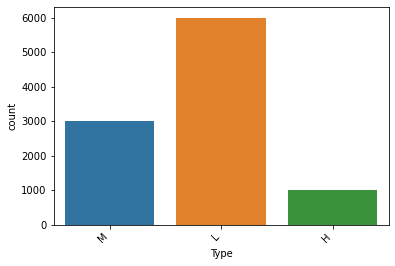

'\nSe observan lo especificado en \n'

In [31]:
# Analisis Variable Type RECUENTO
draw = sns.countplot(df["Type"])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()
"""
Se observan lo especificado en 
"""

In [32]:
                                        ##################################################
                                        ## Analisis de frecuencias variable categoricas ##
                                        ##################################################
# Frecuencia Variable Type
frec_df= pd.DataFrame(df["Type"].value_counts())
# Renombramos el value_count como frecuencia absoluta
frec_df.rename(columns={"Type":"Frec_abs"},inplace=True)
# Calculamos la frecuencia absoluta acumulada
frec_acum= []
aux_acum= 0
for i in (frec_df["Frec_abs"].values):
    aux_acum= aux_acum + i
    frec_acum.append(aux_acum)
frec_df["Frec_abs_acum"]= frec_acum
# Frecuencia Relativa en % 
frec_df["Frec_rel_%"]= 100 * frec_df["Frec_abs"]/len(df.Type)
# Valores de las Frecuencias relativas
frec_rel_val= frec_df["Frec_rel_%"].values
frec_rel_acum= []
aux_acum= 0
for i in frec_rel_val:
    aux_acum= aux_acum + i
    frec_rel_acum.append(aux_acum)
frec_df["Frec_rel_%_acum"]= frec_rel_acum
frec_df

,Frec_abs,Frec_abs_acum,Frec_rel_%,Frec_rel_%_acum
L,6000,6000,60.00,60.00
M,2997,8997,29.97,89.97
H,1003,10000,10.03,100.00


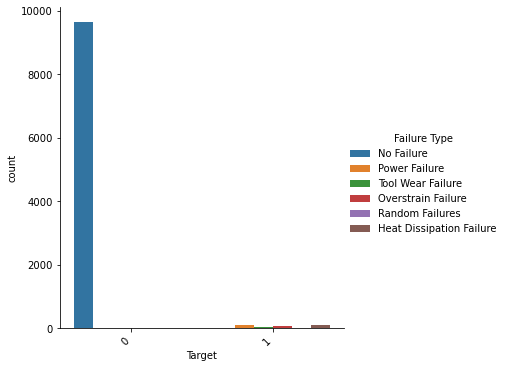

'\nEn el grafico se puede ver un gran desbalance entre los registros sin fallas y los que representan fallas. \nse procedera a ignorar los registros de No Failure(Outlier).\n'

In [33]:
# Recuento de la variable Target_2
draw = sns.catplot(x="Target", hue="Failure Type", data=df, kind="count")
draw.set_xticklabels(rotation=45, ha="right")
plt.show()
"""
En el grafico se puede ver un gran desbalance entre los registros sin fallas y los que representan fallas. 
se procedera a ignorar los registros de No Failure(Outlier).
"""

In [34]:
# Filtramos variables para centrarnos en los momentos de falla 
fallas= df[df['Failure Type']!="No Failure"]

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


'Este grafico muestra como se distribuyen los puntos de rotura, sin embargo son pocos los registros que se ven representados en este grafico'

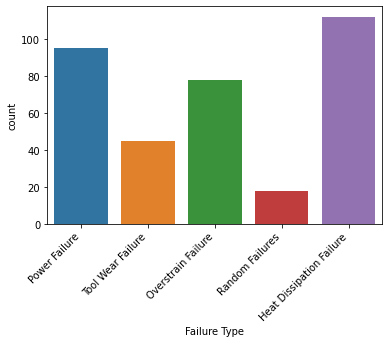

In [45]:
# Graficamos un conteo de roturas 
grafico= sns.countplot(fallas["Failure Type"])
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
"""Este grafico muestra como se distribuyen los puntos de rotura, sin embargo son pocos los registros que se ven representados en este grafico"""

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


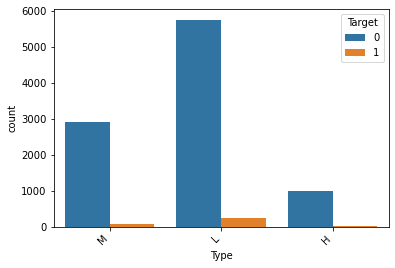

In [36]:
# Conteo de type segmentado segú
draw = sns.countplot(df["Type"], hue= df['Target'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


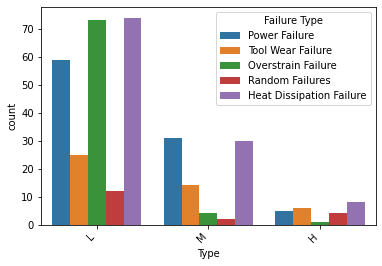

In [37]:
# Conteo segmentacion 
draw = sns.countplot(fallas["Type"], hue= fallas['Failure Type'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

Rotational speed [rpm]


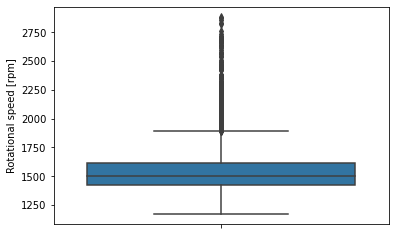

Tool wear [min]


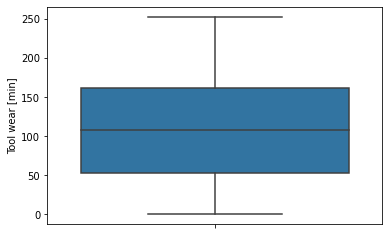

Target
Target es un outlier debido a que su valor es 0 o 1


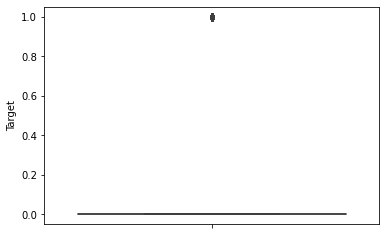

In [50]:
                          #####################################
                          ## Analisis de variables Numericas ##
                          #####################################
# Analisis de int
for aux in int:
  print(aux)
  if aux== "Target":
    print("Target es un outlier debido a que su valor es 0 o 1")
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()
  

'La produccion de el elemento L es el mas producido y el que ma'

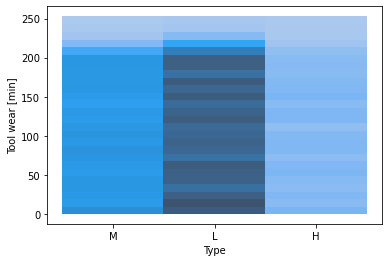

In [59]:
# Histogramas de desgaste.
hist= sns.histplot(y=df["Tool wear [min]"], x=df["Type"])
"La produccion de el elemento L es el mas producido y el que mas desgaste de la herramienta produce"

Air temperature [K]


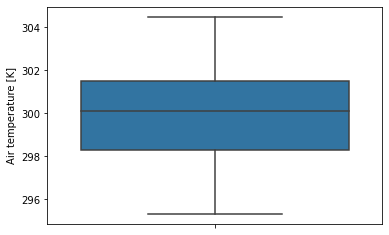

Process temperature [K]


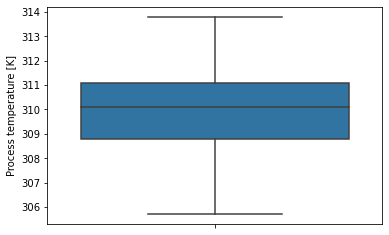

Torque [Nm]


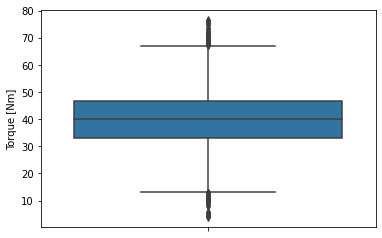

In [48]:
# Analisis de float
for aux in float:
  print(aux)
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()

Text(0.5, 1.05, 'Correlacion de Pearson variables numéricas')

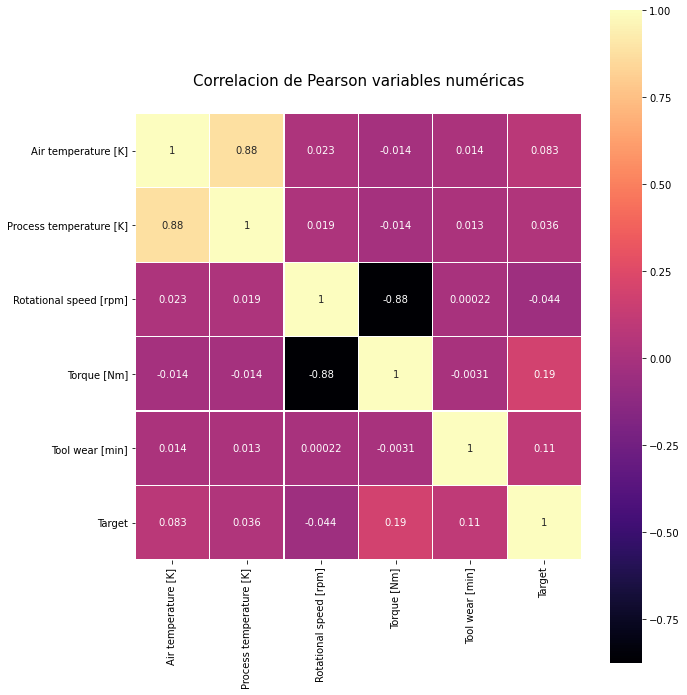

In [ ]:
                                ########################
                                ## Analisis Bivariado ##
                                ########################
# Ploteamos un grafico de correlación de Pearson
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="magma", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Pearson variables numéricas", y=1.05, size=15)

In [ ]:
# Analisis bivariado

In [ ]:
                                        ##################################################
                                        ## Analisis de frecuencias variable categoricas ##
                                        ##################################################
# Frecuencias de Columna TYPE
frec_df= pd.DataFrame(df["Type"].value_counts())
# Renombramos el value_count como frecuencia absoluta
frec_df.rename(columns={"Type":"Frec_abs"},inplace=True)

In [ ]:
# Calculamos la frecuencia absoluta acumulada
frec_acum= []
aux_acum= 0
for i in (frec_df["Frec_abs"].values):
    aux_acum= aux_acum + i
    frec_acum.append(aux_acum)
frec_df["Frec_abs_acum"]= frec_acum
frec_df

,Frec_abs,Frec_abs_acum
L,6000,6000
M,2997,8997
H,1003,10000


In [ ]:
# Frecuencia Relativa en % 
frec_df["Frec_rel_%"]= 100 * frec_df["Frec_abs"]/len(df.Type)


In [ ]:
# Valores de las Frecuencias relativas
frec_rel_val= frec_df["Frec_rel_%"].values
frec_rel_acum= []
aux_acum= 0
for i in frec_rel_val:
    aux_acum= aux_acum + i
    frec_rel_acum.append(aux_acum)
frec_df["Frec_rel_%_acum"]= frec_rel_acum
frec_df

,Frec_abs,Frec_abs_acum,Frec_rel_%,Frec_rel_%_acum
L,6000,6000,60.00,60.00
M,2997,8997,29.97,89.97
H,1003,10000,10.03,100.00
